# Quelques distributions de probabilité pour certains parametres

auteur : Sylvie Dagoret-Campagne

date de creation : 10 février 2021

affiliation : IJCLab/IN2P3/CNRS



In [36]:
from astropy import constants as const
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [37]:
from scipy.stats import stats

# Distribution de $t_0$

- distribution uniforme des $t_0$ des événements microlensing

In [38]:
NYEARS=10
NDAYS=NYEARS*365.25

Text(0.5, 1.0, 'Distribution des $t_0$')

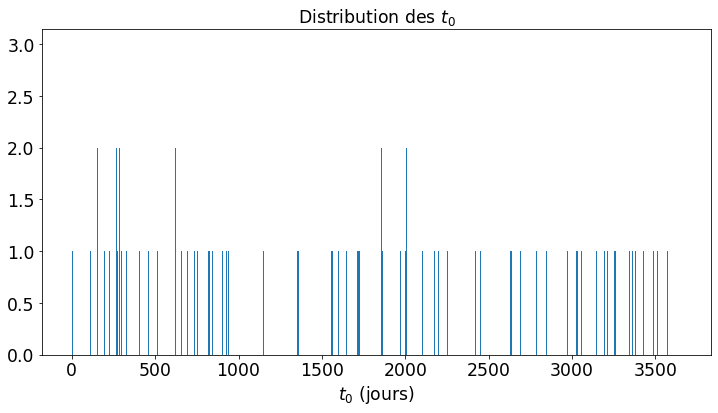

In [39]:
from scipy.stats import uniform
xmin=0
xmax=NDAYS
N=500  # le nombre de simulation peut être artibrairement tres grand. Ce qui compte c'est de calculer l'efficacité de detection de la courbe de lumière
t0=uniform.rvs(xmin,xmax,N)

plt.hist(t0,bins=int(NDAYS));
plt.xlabel("$t_0$ (jours)")
plt.title("Distribution des $t_0$")

## Distribution de $u_{min}$


Le paramètre d'impact $u_{min}$ est tel que $0< u_{min}< 1$.
Sa probabilité est uniforme dans la variable $u^2$:

$$
dp(u) = \frac{ u du d\theta}{ \pi} = d (u^2)
$$


C'est à dire que la fonction cumulative:

$$
P(u_1< u) =\int_{0}^u dp(u_1) = u^2 
$$


Rappelons que pour deux variables aléatoires X de densité de probabilité $p(x)$, Y de densité de probabilité $q(y)$ telles que $y=f(x)$:

$$
dp(Y) = q(y)dy=p(x)dx=dP(X)
$$


$$
p(x) = q(y) \frac{dy}{dx} = q(f(x)) f^\prime(x)
$$


Par exemple pour $q(y)$ une distribution uniforme entre 0 et 1 avec $y=x^2$, alors $x=\sqrt{y}$ a une distribution de probabilité p(x)=$2x$.

In [40]:
N=100000
uminmin=0
uminmax=1
umin=np.sqrt(uniform.rvs(uminmin,uminmax,N)) # inverse de la fonction cumulative d'une variable de distribution uniforme

Text(0.5, 1.0, 'Densité de probabilité de $u_{min}$')

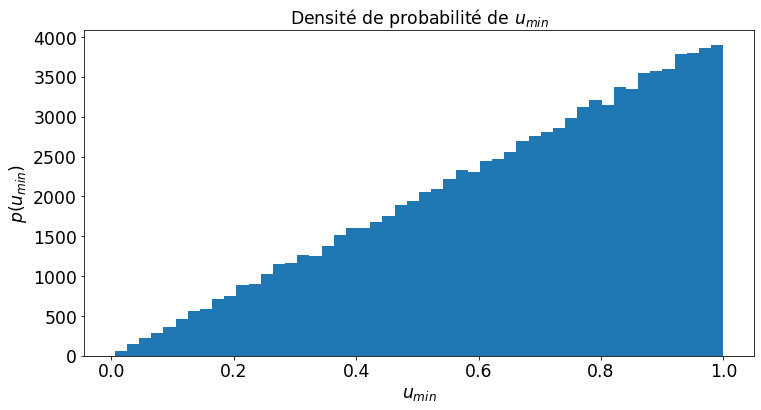

In [41]:
plt.hist(umin,bins=50);
plt.xlabel("$u_{min}$")
plt.ylabel("$p(u_{min})$")
plt.title("Densité de probabilité de $u_{min}$")

# Distribution des $t_E$


$$
t_E(M)= D_L \theta_E/v_T = 79 jours \left( \frac{v_T}{100 km/s} \right)^{-1} \left( \frac{M}{M_{sun}} \right)^{1/2} \left( \frac{D_s}{10 kpc}\right)^{1/2}\left( \frac{(x(1-x))^{1/2}}{0.5}\right)
$$

In [53]:
def t_E(x,M=1,Vt=100,Ds=10):
    return 79.0*(100./Vt)*np.sqrt(M)*np.sqrt(Ds/10)*np.sqrt(x*(1-x))/0.5

In [54]:
N=10000
x=uniform.rvs(0,1,N)

In [55]:
all_tE=t_E(x)

Text(0.5, 1.0, 'Densité de probabilité de $t_{E}$')

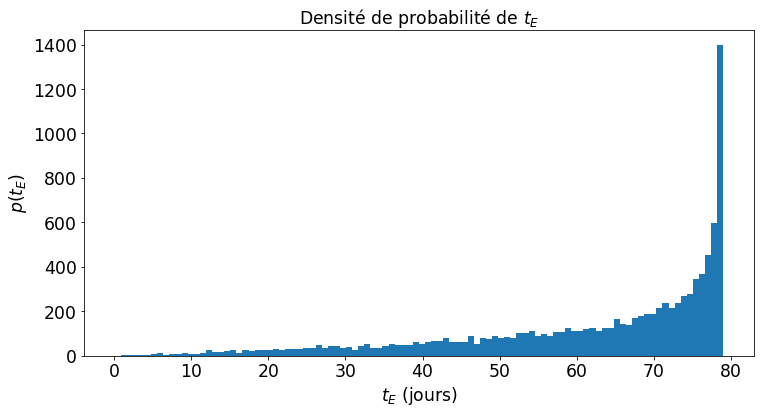

In [56]:
plt.hist(all_tE,bins=100);
plt.xlabel("$t_{E}$ (jours)")
plt.ylabel("$p(t_{E})$")
plt.title("Densité de probabilité de $t_{E}$")

Text(0.5, 1.0, 'Densité de probabilité de $\\sqrt{x(1-x)}/0.5$ ')

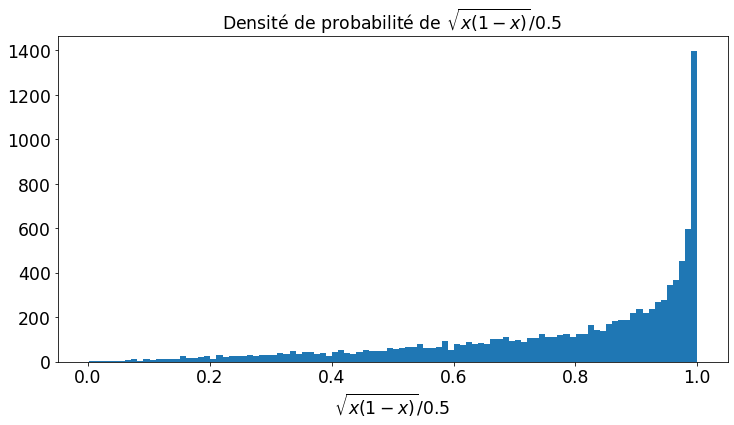

In [57]:
plt.hist(np.sqrt(x*(1-x))/0.5,bins=100);
plt.xlabel("$\sqrt{x(1-x)}/0.5$ ")

plt.title("Densité de probabilité de $\sqrt{x(1-x)}/0.5$ ")